### Loan Application Status Prediction

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


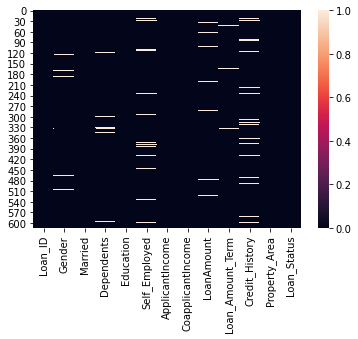

In [6]:
sns.heatmap(data.isnull())

In [7]:
#There are null values in the dataset

In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#replace null values
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [10]:
data.select_dtypes(exclude=['object']).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x17771fb8760>,
 'caps': [<matplotlib.lines.Line2D at 0x17771fb8e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x17771fb8400>],
 'medians': [<matplotlib.lines.Line2D at 0x17771fc6520>],
 'fliers': [<matplotlib.lines.Line2D at 0x17771fc6820>],
 'means': []}

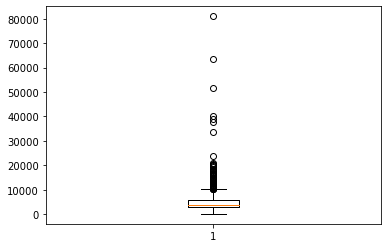

In [11]:
plt.boxplot(data.ApplicantIncome)

{'whiskers': [<matplotlib.lines.Line2D at 0x17772017d00>,
 'caps': [<matplotlib.lines.Line2D at 0x17772023400>,
 'boxes': [<matplotlib.lines.Line2D at 0x17772017970>],
 'medians': [<matplotlib.lines.Line2D at 0x17772023ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17772023dc0>],
 'means': []}

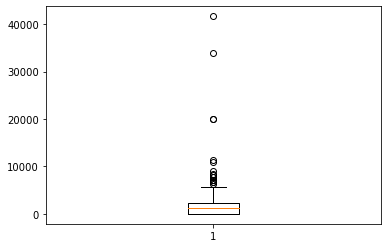

In [12]:
plt.boxplot(data.CoapplicantIncome)

{'whiskers': [<matplotlib.lines.Line2D at 0x1777206fca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1777207b3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1777206f940>],
 'medians': [<matplotlib.lines.Line2D at 0x1777207ba60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1777207bd60>],
 'means': []}

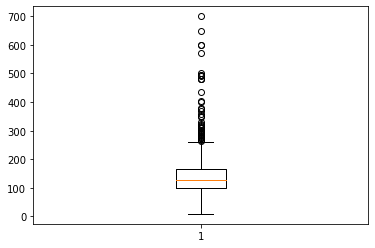

In [13]:
plt.boxplot(data.LoanAmount)

{'whiskers': [<matplotlib.lines.Line2D at 0x177720cac70>,
 'caps': [<matplotlib.lines.Line2D at 0x177720d6370>,
 'boxes': [<matplotlib.lines.Line2D at 0x177720ca910>],
 'medians': [<matplotlib.lines.Line2D at 0x177720d6a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x177720d6d30>],
 'means': []}

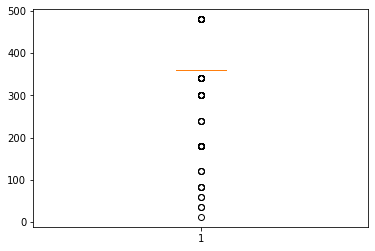

In [14]:
plt.boxplot(data.Loan_Amount_Term)

{'whiskers': [<matplotlib.lines.Line2D at 0x1777212c160>,
 'caps': [<matplotlib.lines.Line2D at 0x1777212c820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1777211ddc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1777212cee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17772135220>],
 'means': []}

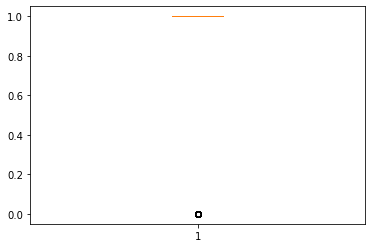

In [15]:
plt.boxplot(data.Credit_History)

In [16]:
#There are outliers in All columns. But these might be due to large change in Income and loan amount etc. S
#So we are keeping this data

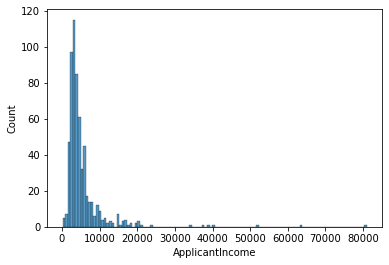

In [17]:
sns.histplot(data.ApplicantIncome)

In [18]:
#MOst of the income lies between 0-10000

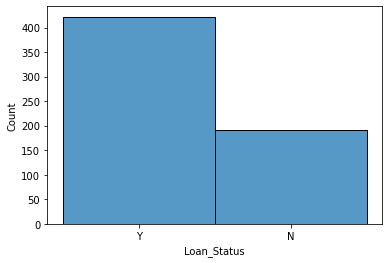

In [19]:
sns.histplot(data.Loan_Status)

In [20]:
#The entropy is less

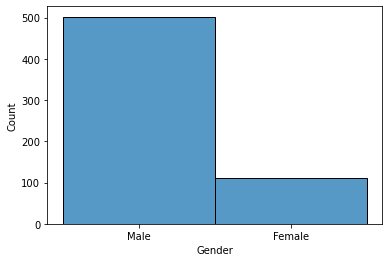

In [21]:
sns.histplot(data.Gender)

In [22]:
#Men applied for loan than women

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


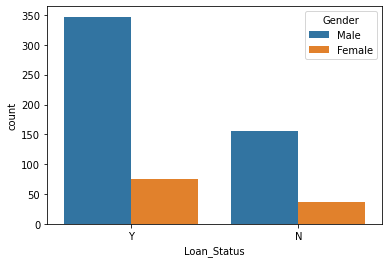

In [23]:
sns.countplot(data.Loan_Status, hue=data.Gender)

In [24]:
data.Dependents.nunique()

4

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


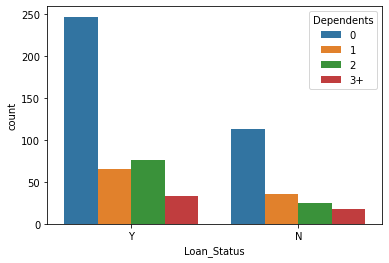

In [25]:
sns.countplot(data.Loan_Status, hue=data.Dependents)

In [26]:
#Loan has approved more for people who have less dependents

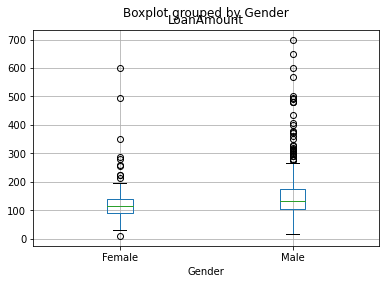

In [27]:
data.boxplot(column='LoanAmount', by = 'Gender')

In [28]:
pd.crosstab(data ['Credit_History'], data ['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,110,415,525
All,192,422,614


In [29]:
#People with credit score get loan than people who have not credit score

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


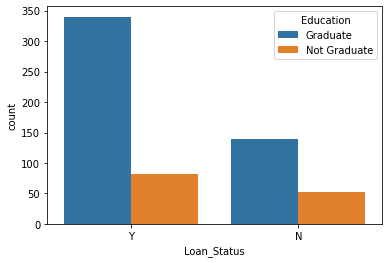

In [30]:
sns.countplot(data.Loan_Status, hue=data.Education)

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


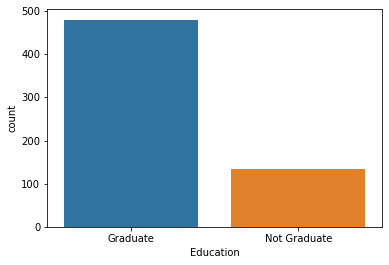

In [31]:
sns.countplot(data.Education)

In [32]:
#more of the loan applicants are graduates and 70% of their loan has approved

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


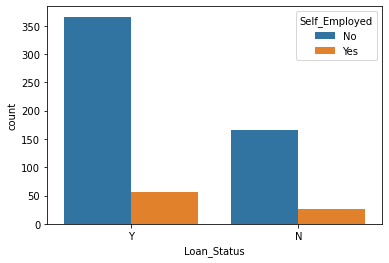

In [33]:
sns.countplot(data.Loan_Status, hue=data.Self_Employed)

In [34]:
#There is a lesser chance to get loan approved for self employed

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


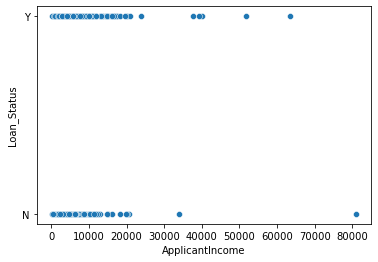

In [35]:
sns.scatterplot(data.ApplicantIncome, data.Loan_Status)

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


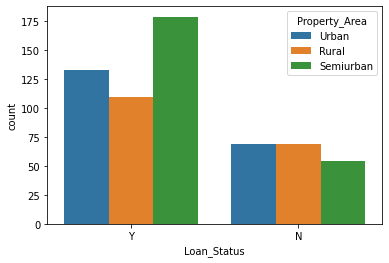

In [36]:
sns.countplot(data.Loan_Status, hue=data.Property_Area)

In [37]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [38]:
data.Loan_ID.nunique()

614

In [39]:
data.drop("Loan_ID", inplace=True, axis=1)

In [40]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [41]:
data.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
dtype: float64

In [42]:
data.Loan_Amount_Term.unique()

array([360., 120., 240., 342., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [43]:
data['Total_Income'] = data['ApplicantIncome'] + data["CoapplicantIncome"]

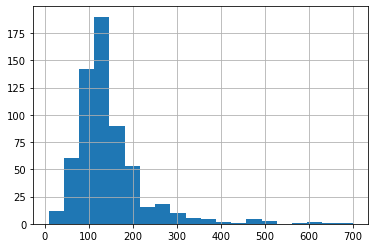

In [44]:
data['LoanAmount'].hist(bins=20)

In [45]:
data['LoanAmount'] = np.log(data['LoanAmount'])

In [50]:
from sklearn.preprocessing import power_transform

In [54]:
data['Total_Income'] = power_transform(np.array(data['Total_Income']).reshape(-1,1))
data['Loan_Amount_Term'] = power_transform(np.array(data['Loan_Amount_Term']).reshape(-1,1))

In [56]:
#skewness removed

In [57]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,4.986426,0.181417,1.0,Urban,Y,0.143277
1,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,0.181417,1.0,Rural,N,0.220941
2,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,0.181417,1.0,Urban,Y,-1.403494
3,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,0.181417,1.0,Urban,Y,-0.197584
4,Male,No,0,Graduate,No,6000,0.0,4.948760,0.181417,1.0,Urban,Y,0.192288


In [58]:
from sklearn.preprocessing import LabelEncoder

In [63]:
columns = ['Gender','Married','Education','Self_Employed','Property_Area', 'Loan_Status','Dependents']
for i in columns:
    le = LabelEncoder()
    data[i]=le.fit_transform(data[i].astype('str'))

In [65]:
data.drop(["CoapplicantIncome", "ApplicantIncome"], inplace=True, axis=1)

In [66]:
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,4.986426,0.181417,1.0,2,1,0.143277
1,1,1,1,0,0,4.852030,0.181417,1.0,0,0,0.220941
2,1,1,0,0,1,4.189655,0.181417,1.0,2,1,-1.403494
3,1,1,0,1,0,4.787492,0.181417,1.0,2,1,-0.197584
4,1,0,0,0,0,4.948760,0.181417,1.0,2,1,0.192288
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,4.262680,0.181417,1.0,0,1,-1.498116
610,1,1,3,0,0,3.688879,-2.290755,1.0,0,1,-0.607565
611,1,1,1,0,0,5.533389,0.181417,1.0,2,1,0.767730
612,1,1,2,0,0,5.231109,0.181417,1.0,2,1,0.614764


In [67]:
x = data.loc[:,data.columns != "Loan_Status"]

In [68]:
x

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,0,0,0,0,4.986426,0.181417,1.0,2,0.143277
1,1,1,1,0,0,4.852030,0.181417,1.0,0,0.220941
2,1,1,0,0,1,4.189655,0.181417,1.0,2,-1.403494
3,1,1,0,1,0,4.787492,0.181417,1.0,2,-0.197584
4,1,0,0,0,0,4.948760,0.181417,1.0,2,0.192288
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,4.262680,0.181417,1.0,0,-1.498116
610,1,1,3,0,0,3.688879,-2.290755,1.0,0,-0.607565
611,1,1,1,0,0,5.533389,0.181417,1.0,2,0.767730
612,1,1,2,0,0,5.231109,0.181417,1.0,2,0.614764


In [69]:
y = data.loc[:,"Loan_Status"]

In [70]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [73]:
#finding best random state
max_acc = 0
max_rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_acc:
        max_acc = acc
        max_rs = i
print("Best random state=",max_rs)

Best random state= 28


In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = 28)

In [77]:
models = {"SVC":SVC(),"KNN":KNeighborsClassifier(), "RandomForest":RandomForestClassifier(),
          "LogisticRegression":LogisticRegression(), "naive":GaussianNB() }
acc = {}
mod_list = []
for i in models:
    mod = i
    mod = models[i]
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    sc = accuracy_score(y_test,pred)
    acc[i] = sc
    mod_list.append(mod)
print(acc)

{'SVC': 0.8676470588235294, 'KNN': 0.75, 'RandomForest': 0.8235294117647058, 'LogisticRegression': 0.875, 'naive': 0.8676470588235294}


In [78]:
#applying cross validation
from sklearn.model_selection import cross_val_score

In [79]:
cv_list = {}
for i in mod_list:
    cv = cross_val_score(i, x, y, cv=7)
    cv_list[str(i)] = cv.mean()
print(cv_list)

{'SVC()': 0.8078631138975967, 'KNeighborsClassifier()': 0.7165994924615614, 'RandomForestClassifier()': 0.7802470517987758, 'LogisticRegression()': 0.8095051500223914, 'GaussianNB()': 0.8078444543961787}


In [80]:
#KNN is the best algorithm(difference 3.4)

In [81]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [82]:
parameters = {'leaf_size': list(range(1,50)),  
              'n_neighbors': list(range(1,30)), 
              'p': [1,2]}

In [83]:
GCV = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)

In [84]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})

In [85]:
GCV.best_params_

{'leaf_size': 1, 'n_neighbors': 7, 'p': 1}

In [86]:
GCV_predict = GCV.best_estimator_.predict(x_test)

In [87]:
accuracy_score(y_test, GCV_predict)

0.7794117647058824

In [88]:
#saving model
import joblib
joblib.dump(GCV.best_estimator_, "Loan.obj")

['Loan.obj']